<a href="https://colab.research.google.com/github/Jay0073/Students-Performance-Indicator/blob/main/Students_Performance_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Student Performance Indicator**

The objective of this project is to understand how the academic performance of students, measured by their test scores, is influenced by various factors such as:
 - Gender
 - Ethnicity
 - Parental level of education
 - Lunch
 - Test preparation course

By analyzing these variables, we aim to uncover patterns that can help improve educational outcomes and provide targeted support to students who need it.
Insights from this analysis can also inform educational policies and help allocate resources more effectively, ensuring that support reaches the students who need it most.

The use of machine learning models in this project adds significant value as they can identify complex patterns in data, making predictions about student performance based on the various factors studied. These models facilitate data-driven decision-making, ensuring that interventions are based on empirical evidence.

In summary, this project leverages machine learning to derive actionable insights from large data, aiming to enhance educational outcomes and support the success of all students.

Key Point of this project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#Importing necessary Libraries

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [204]:
%matplotlib inline

#Reading .csv file

In [205]:
df = pd.read_csv("StudentsPerformance.csv")

In [206]:
df.shape

(1000, 8)

In [207]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [208]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [209]:
print("Gender: ", df['gender'].unique())
print("Race/ethnicity: ", df['race/ethnicity'].unique())
print("Parental level of education: ", df['parental level of education'].unique())
print("Lunch: ", df['lunch'].unique())
print("Test preparation course: ", df['test preparation course'].unique())


Gender:  ['female' 'male']
Race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Lunch:  ['standard' 'free/reduced']
Test preparation course:  ['none' 'completed']


# **Exploratory Data Analysis**

#Univariate Analysis

<Axes: xlabel='count', ylabel='gender'>

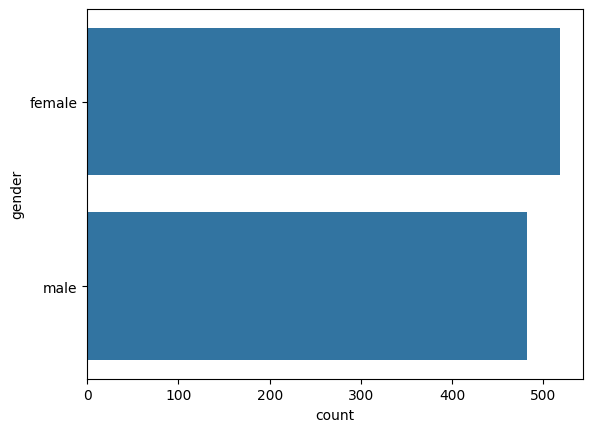

In [210]:
sns.countplot(df['gender'])

<Axes: xlabel='count', ylabel='parental level of education'>

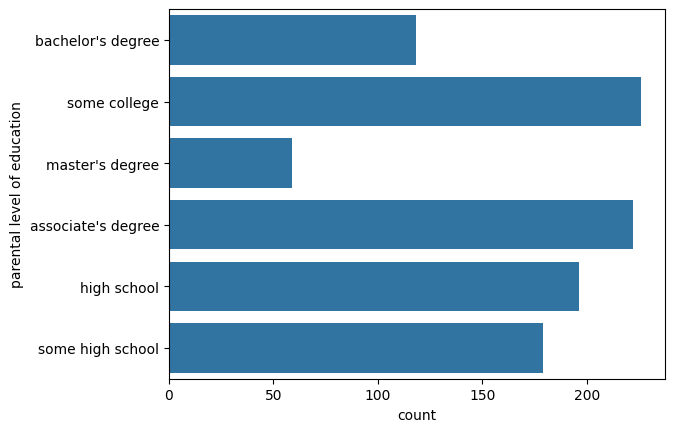

In [211]:
sns.countplot(df['parental level of education'])

<Axes: xlabel='count', ylabel='race/ethnicity'>

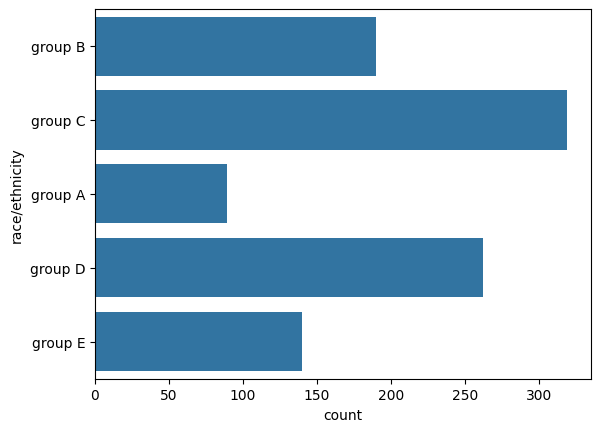

In [212]:
sns.countplot(df['race/ethnicity'])

<Axes: xlabel='count', ylabel='lunch'>

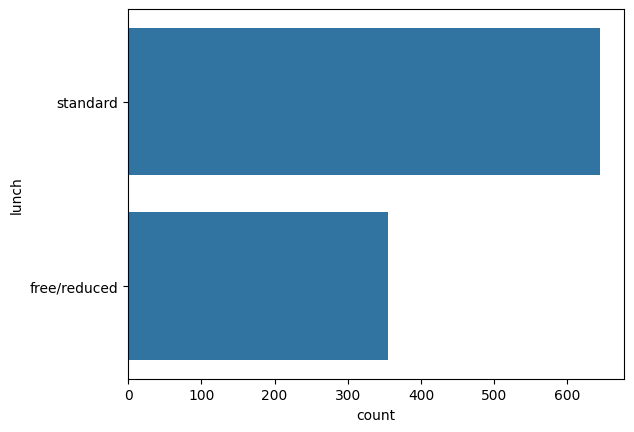

In [213]:
sns.countplot(df['lunch'])

<Axes: xlabel='count', ylabel='test preparation course'>

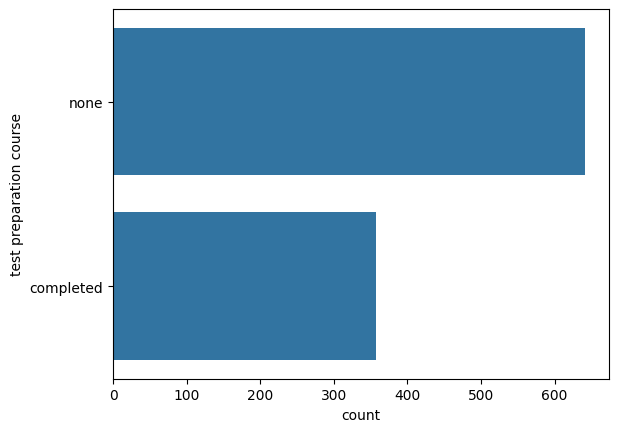

In [214]:
sns.countplot(df['test preparation course'])

<ipython-input-215-913cdd0f89a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


<Axes: xlabel='math score', ylabel='Density'>

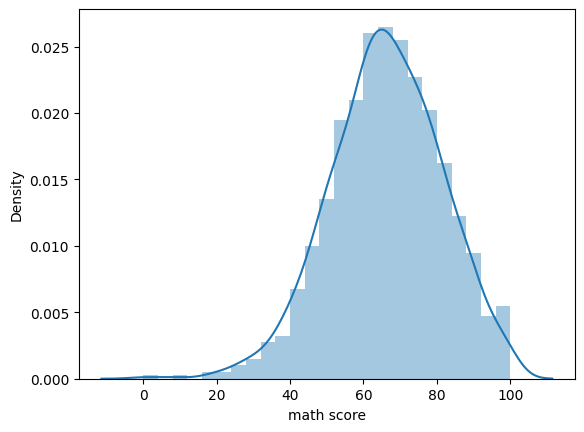

In [215]:
sns.distplot(df['math score'])

<ipython-input-216-7a07854a04a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

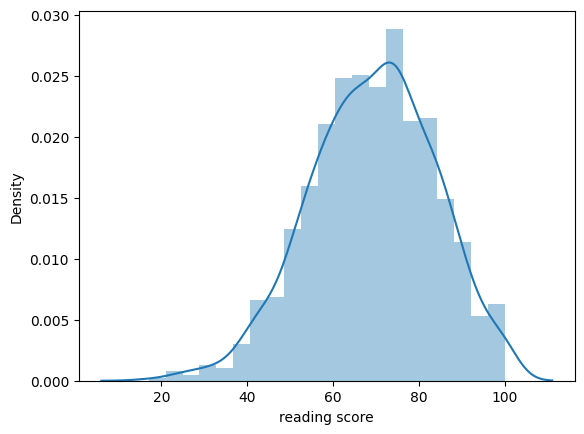

In [216]:
sns.distplot(df['reading score'])

<ipython-input-217-cf2fe8eaa9cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

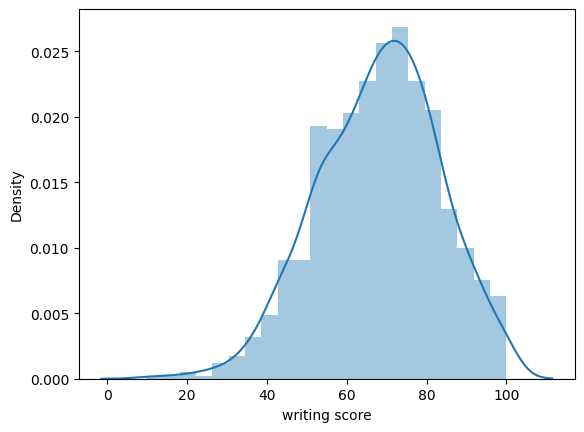

In [217]:
sns.distplot(df['writing score'])

#Bivariate Analysis


<Axes: xlabel='gender', ylabel='math score'>

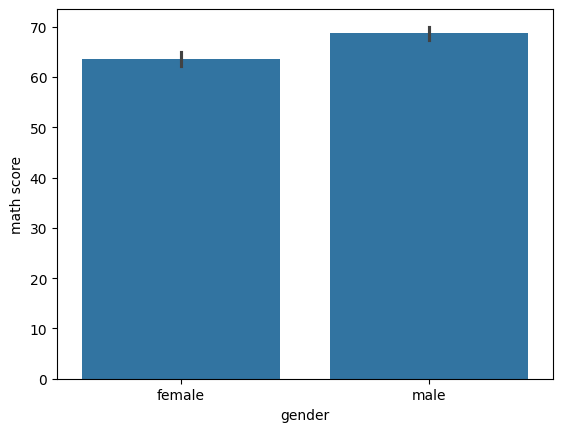

In [218]:
sns.barplot(x='gender',y='math score',data=df)

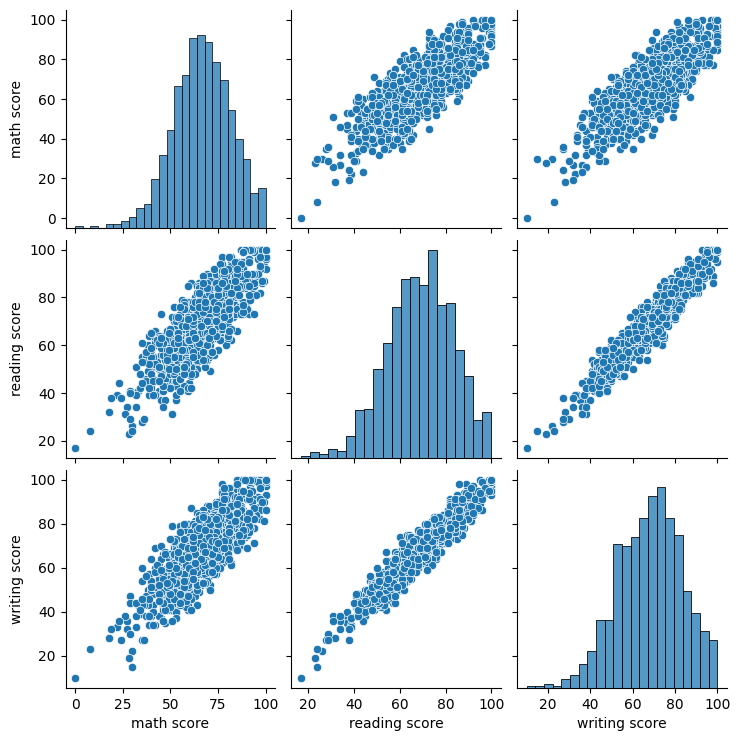

In [219]:
sns.pairplot(df)

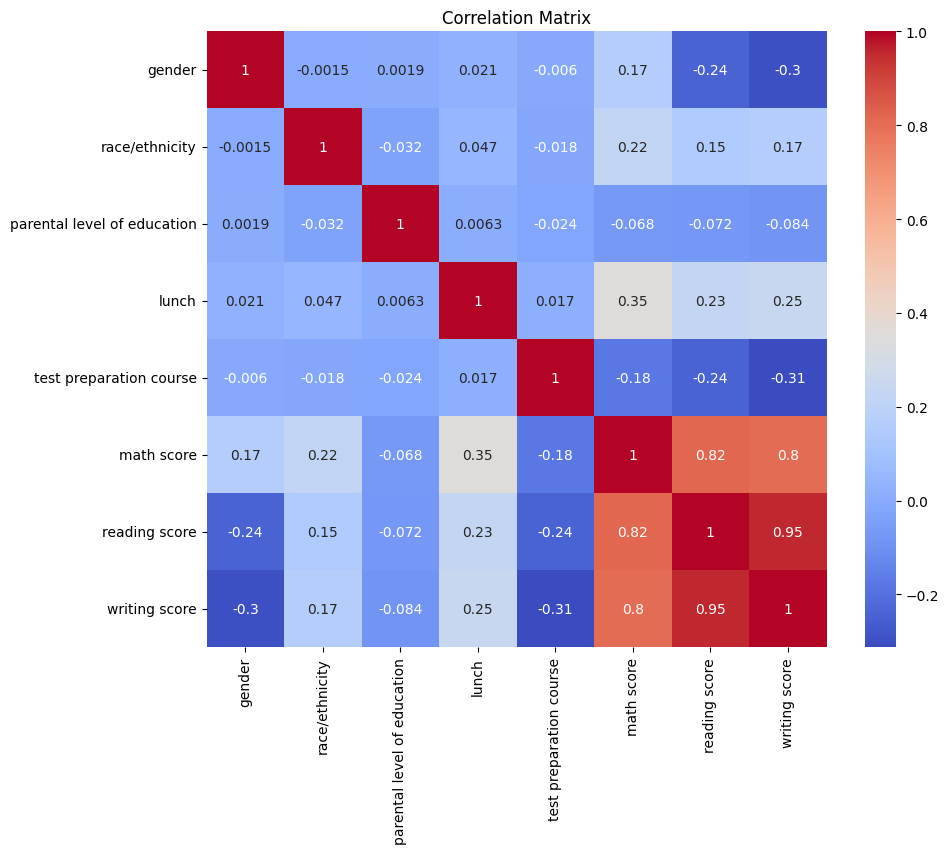

In [220]:
temporary_df = df.copy()

# Encoding to convert all the catagorical values to numerical values
label_encoders = {}
for column in temporary_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    temporary_df[column] = label_encoders[column].fit_transform(temporary_df[column])

# Calculate correlation matrix
correlation_matrix = temporary_df.corr()


# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

# **Feature Engineering**

In [221]:
X = df.drop(['math score'],axis=1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [222]:
Y = df['math score']
Y

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [223]:
numerical_columns =  X.select_dtypes(include=np.number).columns
numerical_columns

Index(['reading score', 'writing score'], dtype='object')

In [224]:
categorical_columns = X.select_dtypes(include='object').columns
categorical_columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [225]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_columns),
        ("cat", categorical_transformer, categorical_columns)
    ]
)

x_processed = preprocessor.fit_transform(X)
x_processed

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [226]:
x_processed.shape

(1000, 19)

In [227]:
encoded_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_columns)
all_feature_names = np.concatenate([numerical_columns, encoded_feature_names])
print(all_feature_names)

['reading score' 'writing score' 'gender_female' 'gender_male'
 'race/ethnicity_group A' 'race/ethnicity_group B'
 'race/ethnicity_group C' 'race/ethnicity_group D'
 'race/ethnicity_group E' "parental level of education_associate's degree"
 "parental level of education_bachelor's degree"
 'parental level of education_high school'
 "parental level of education_master's degree"
 'parental level of education_some college'
 'parental level of education_some high school' 'lunch_free/reduced'
 'lunch_standard' 'test preparation course_completed'
 'test preparation course_none']


# **Model Selection and Training, Model Evaluation and Feature Importance Analysis**

In [228]:
def evaluate_model(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, rmse, r2_square

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x_processed, Y, test_size=0.2, random_state=42)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
Root Mean Squared Error: 5.3940
Mean Absolute Error: 4.2148
R2 Score: 0.8804


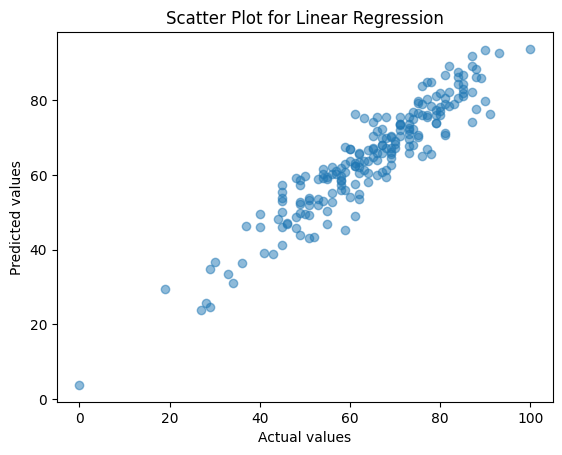

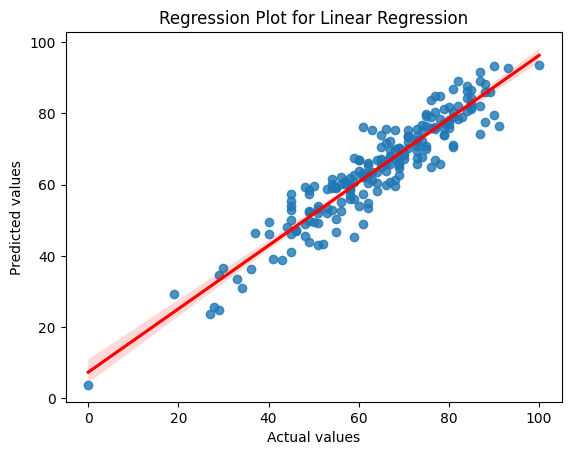

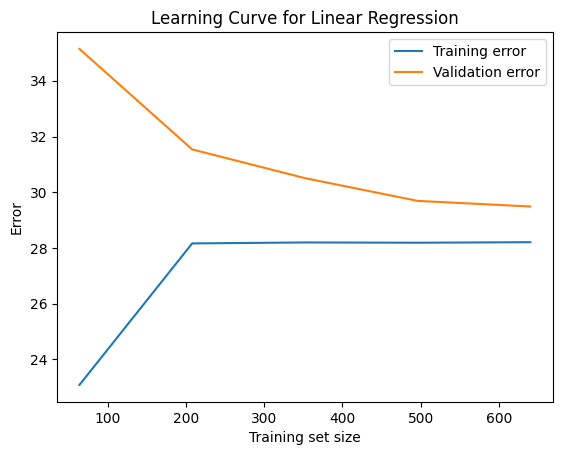



Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
Root Mean Squared Error: 6.5197
Mean Absolute Error: 5.1579
R2 Score: 0.8253


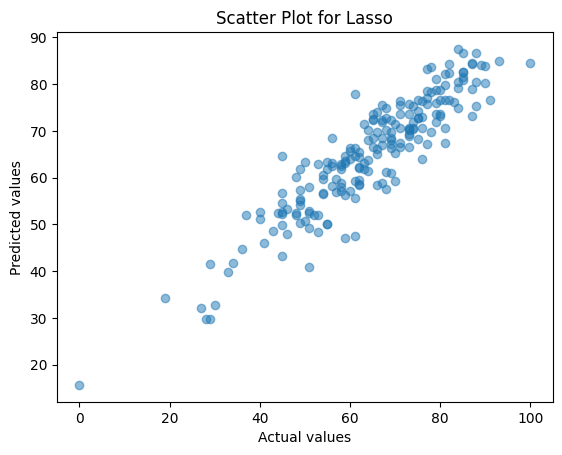

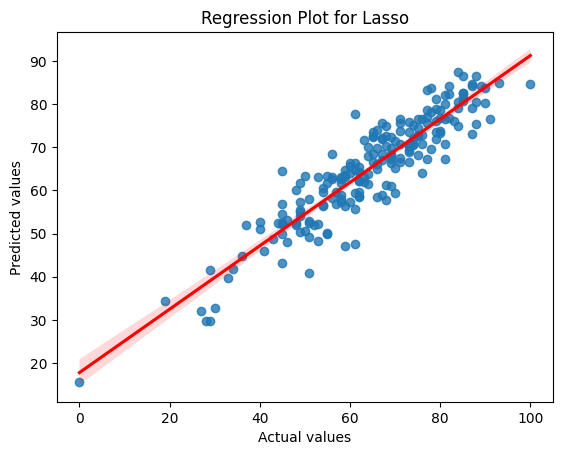

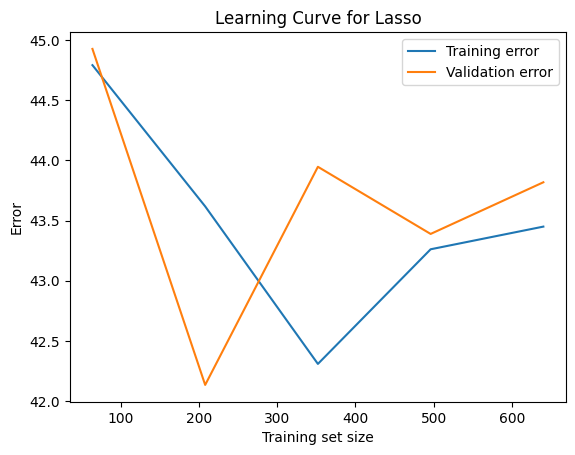



Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
Root Mean Squared Error: 5.3904
Mean Absolute Error: 4.2111
R2 Score: 0.8806


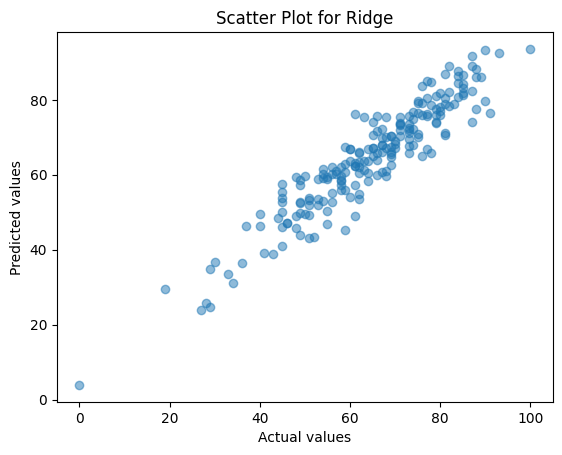

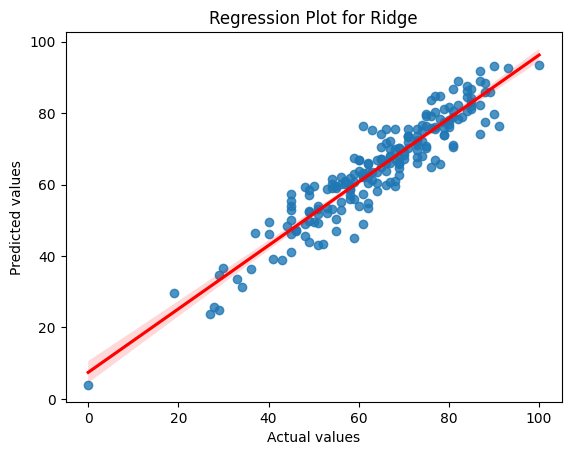

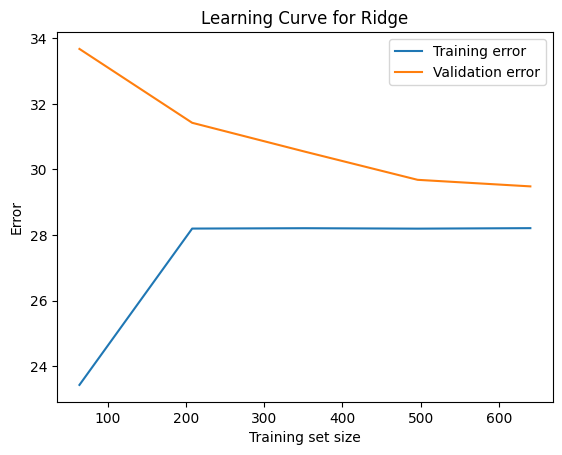



K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7053
- Mean Absolute Error: 4.5067
- R2 Score: 0.8556
----------------------------------
Model performance for Test set
Root Mean Squared Error: 7.2786
Mean Absolute Error: 5.6330
R2 Score: 0.7823


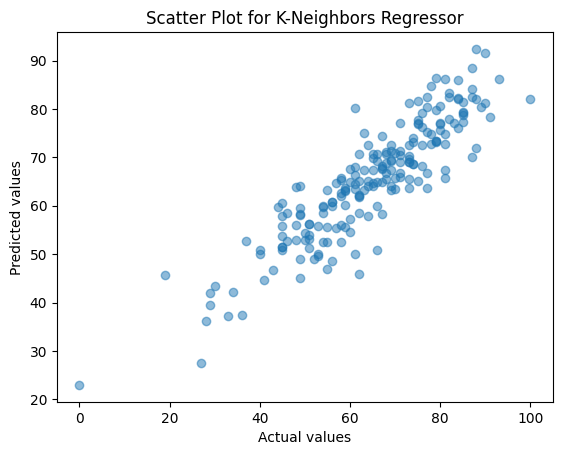

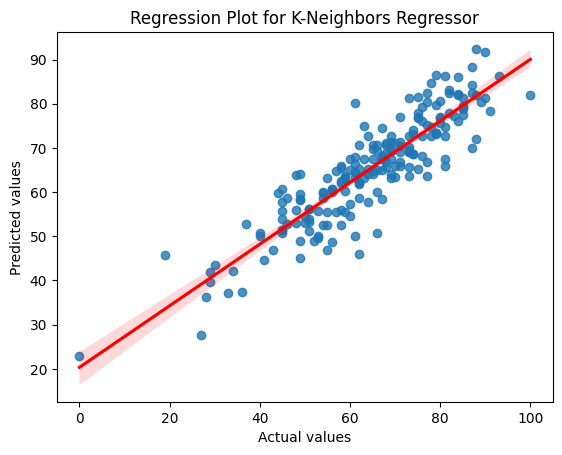

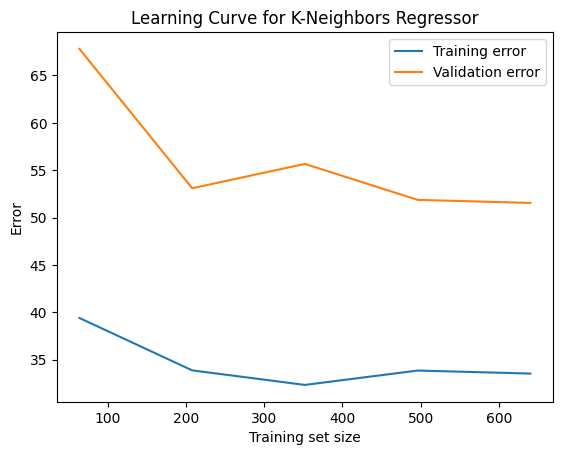



Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
Root Mean Squared Error: 7.6557
Mean Absolute Error: 6.1100
R2 Score: 0.7591


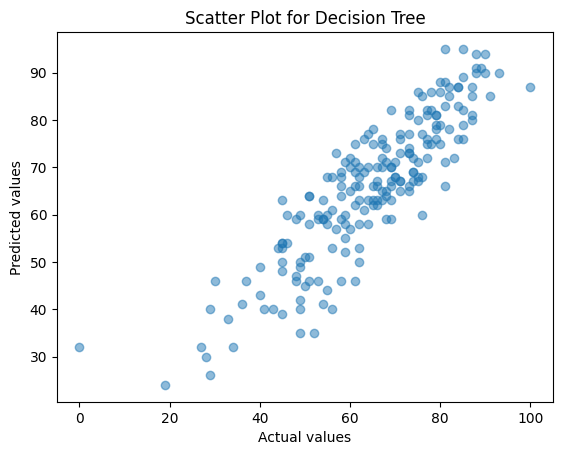

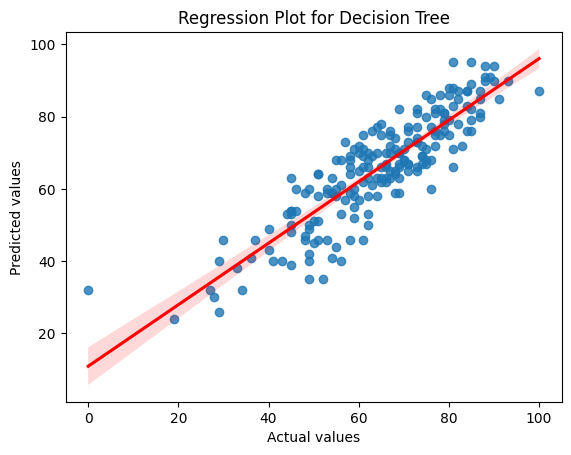

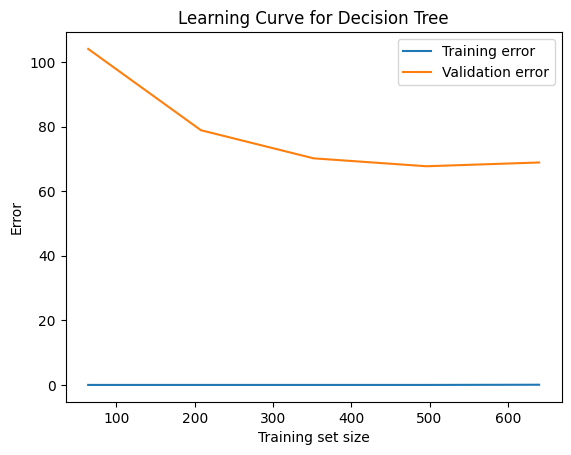

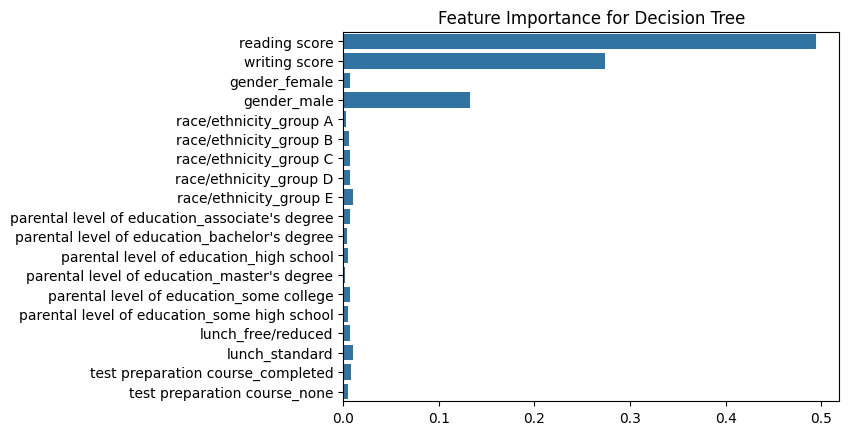



Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2927
- Mean Absolute Error: 1.8240
- R2 Score: 0.9767
----------------------------------
Model performance for Test set
Root Mean Squared Error: 5.9791
Mean Absolute Error: 4.6173
R2 Score: 0.8531


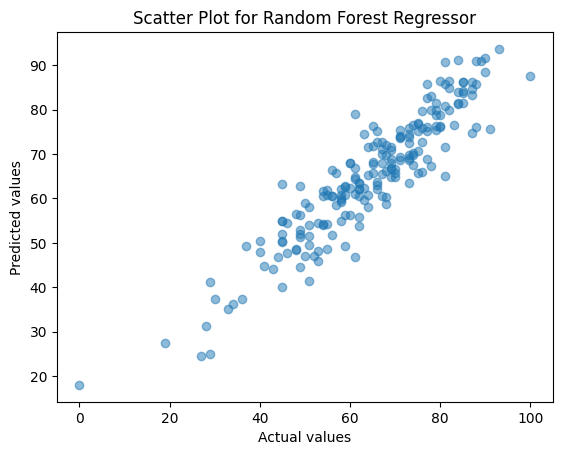

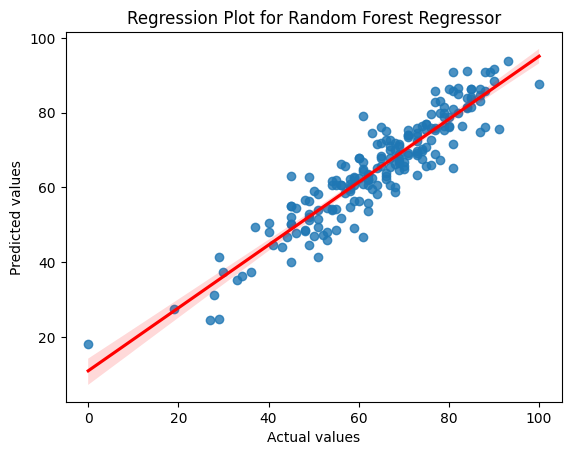

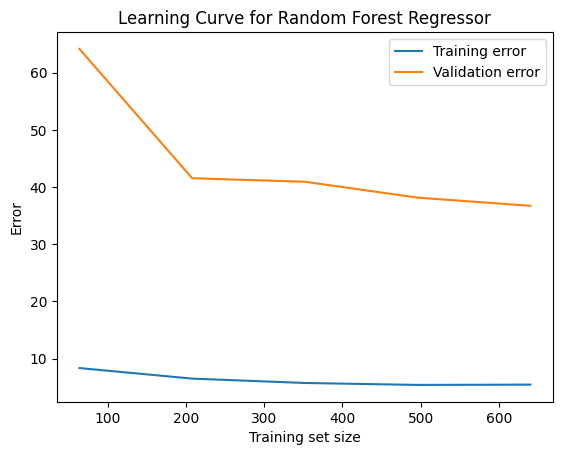

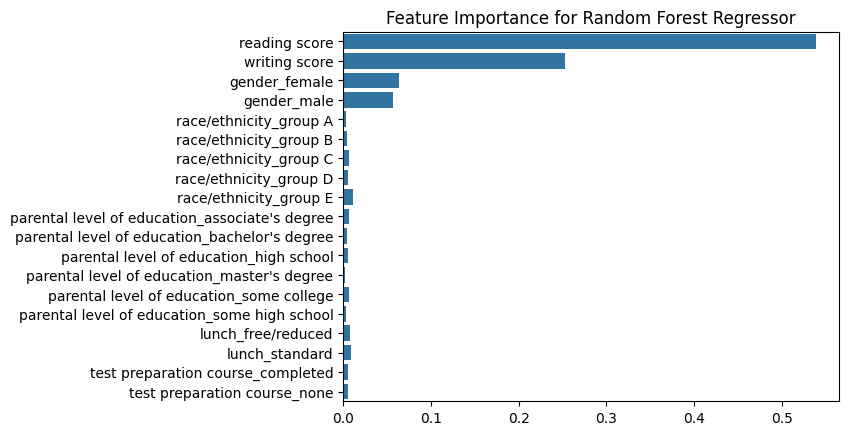



XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
----------------------------------
Model performance for Test set
Root Mean Squared Error: 6.5958
Mean Absolute Error: 5.1036
R2 Score: 0.8212


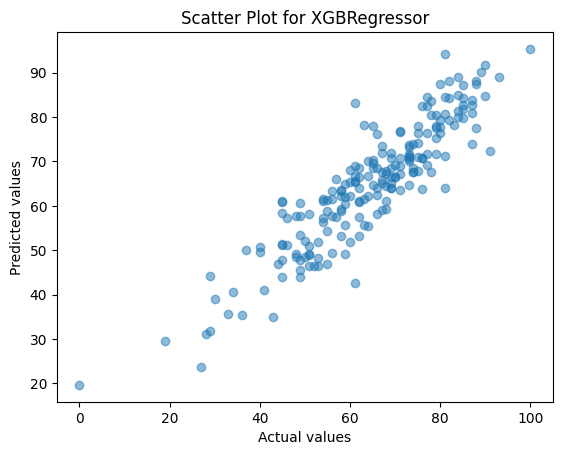

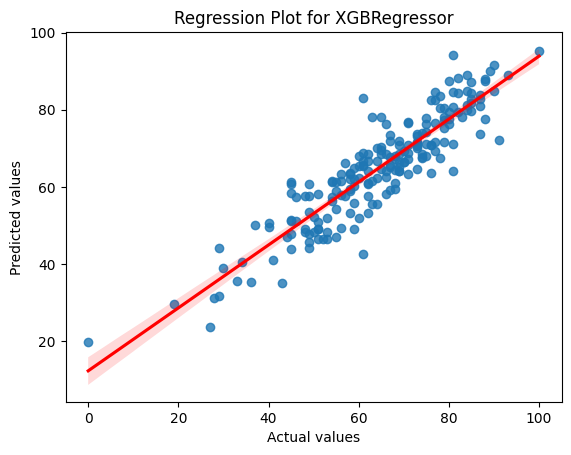

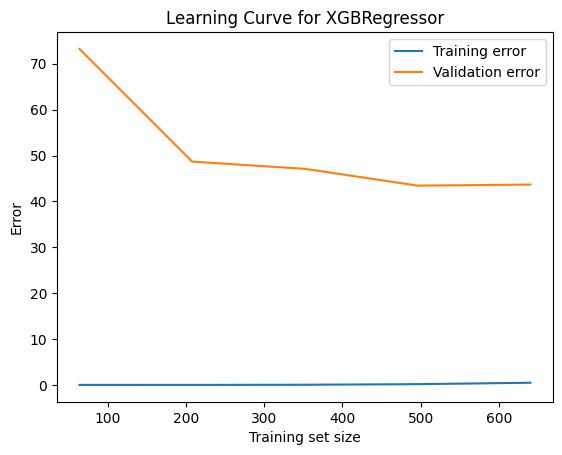

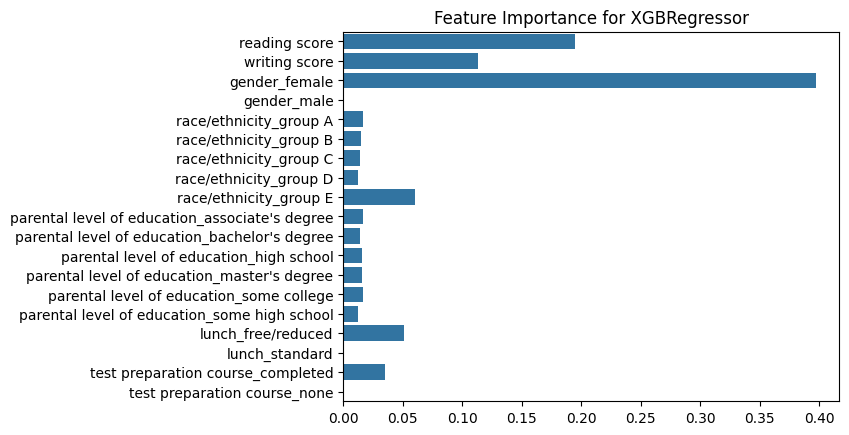

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve

# Assuming x_train and x_test are numpy arrays
if isinstance(x_train, np.ndarray):
    feature_names = all_feature_names
    x_train = pd.DataFrame(x_train, columns=feature_names)
    x_test = pd.DataFrame(x_test, columns=feature_names)

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    # Scatter Plot
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title(f"Scatter Plot for {list(models.keys())[i]}")
    plt.show()

    # Regression Plot
    sns.regplot(x=y_test, y=y_test_pred, line_kws={"color": "red"})
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title(f"Regression Plot for {list(models.keys())[i]}")
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, test_scores_mean, label='Validation error')
    plt.ylabel('Error')
    plt.xlabel('Training set size')
    plt.title(f"Learning Curve for {list(models.keys())[i]}")
    plt.legend()
    plt.show()

    # Feature Importance for Tree-based models
    if list(models.keys())[i] in ["Decision Tree", "Random Forest Regressor", "XGBRegressor"]:
        importance = model.feature_importances_
        sns.barplot(x=importance, y=feature_names)
        plt.title(f"Feature Importance for {list(models.keys())[i]}")
        plt.show()

    print('='*130)
    print('\n')


# **Interpretation and Insights**

Based on the model performance metrics for both the training and test sets, the Linear Regression and Ridge Regression models performed the best overall. Here's an interpretation and some insights for each model:

Linear Regression

Training Set:

1.   Training Set:
 - Root Mean Squared Error : 5.3231

 - Mean Absolute Error : 4.2667

 - R2 Score : 0.8743

2.   Test Set:

 - Root Mean Squared Error : 5.3940

 - Mean Absolute Error : 4.2148

 - R2 Score : 0.8804

Ridge Regression
 1. Training Set:

  - Root Mean Squared Error: 5.3233

  - Mean Absolute Error : 4.2650

  - R2 Score: 0.8743

 2. Test Set:

  - Root Mean Squared Error : 5.3904

  - Mean Absolute Error : 4.2111

  - R2 Score: 0.8806


# Model Prediction vs Actual values

In [232]:
def get_predictions_and_differences(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Difference": y_test - y_pred})
    return results

# Linear Regression model
linear_model = LinearRegression()
linear_results = get_predictions_and_differences(linear_model, x_train, y_train, x_test, y_test)
print("Linear Regression Predictions:")
print(linear_results)

# Ridge Regression model
ridge_model = Ridge()
ridge_results = get_predictions_and_differences(ridge_model, x_train, y_train, x_test, y_test)
print("Ridge Regression Predictions:")
print(ridge_results)

Linear Regression Predictions:
     Actual  Predicted  Difference
521      91  76.387970   14.612030
737      53  58.885970   -5.885970
740      80  76.990265    3.009735
660      74  76.851804   -2.851804
411      84  87.627378   -3.627378
..      ...        ...         ...
408      52  43.409149    8.590851
332      62  62.152214   -0.152214
208      74  67.888395    6.111605
613      65  67.022287   -2.022287
78       61  62.345132   -1.345132

[200 rows x 3 columns]
Ridge Regression Predictions:
     Actual  Predicted  Difference
521      91  76.398705   14.601295
737      53  58.842469   -5.842469
740      80  76.992129    3.007871
660      74  76.805898   -2.805898
411      84  87.615387   -3.615387
..      ...        ...         ...
408      52  43.492293    8.507707
332      62  62.170763   -0.170763
208      74  67.910325    6.089675
613      65  67.061504   -2.061504
78       61  62.427189   -1.427189

[200 rows x 3 columns]


In [234]:
# Define a threshold for high performance (e.g., score above 80)
threshold = 70

# Actual values
high_performers_actual = linear_results[linear_results['Actual'] > threshold]

# Predicted values
high_performers_predicted = linear_results[linear_results['Predicted'] > threshold]

# Calculate percentages
percentage_actual_high_performers = (len(high_performers_actual) / len(linear_results)) * 100
percentage_predicted_high_performers = (len(high_performers_predicted) / len(linear_results)) * 100

print(f"Percentage of students who actually performed well: {percentage_actual_high_performers:.2f}%")
print(f"Percentage of students predicted to perform well in the future: {percentage_predicted_high_performers:.2f}%")


Percentage of students who actually performed well: 37.50%
Percentage of students predicted to perform well in the future: 39.00%


#Insights:
Linear Regression and Ridge Regression models have similar performance metrics, with high R2 scores (~0.88) for both training and test sets, indicating that these models explain around 88% of the variance in the test data. The RMSE and MAE values are also relatively low, suggesting that these models have good predictive accuracy. Furthermore, the percentage of students who actually performed well, defined as scoring above a threshold of 70, is 37.50%, while the percentage of students predicted to perform well in the future is 39.00%.

#Other Models:
Lasso Regression: Slightly lower performance than Linear and Ridge Regression, with an R2 score of 0.8253 on the test set. This indicates that while Lasso also performs well, it doesn't quite match the performance of the linear and ridge models.

K-Neighbors Regressor: Lower R2 score (0.7823) on the test set, indicating it is less accurate compared to Linear and Ridge Regression.

Decision Tree: Overfitting is evident with an R2 score of 0.9997 on the training set but only 0.7247 on the test set. This means the model fits the training data almost perfectly but generalizes poorly to new data.

Random Forest Regressor: Good performance on the training set (R2 = 0.9756), but a slight drop on the test set (R2 = 0.8501). This indicates some overfitting but still a robust model.

XGBRegressor: High R2 score (0.9955) on the training set and slightly lower (0.8212) on the test set, showing overfitting like the Decision Tree and Random Forest models.

#Conclusion:
Overall, Linear Regression and Ridge Regression models provide the best balance between simplicity and predictive accuracy for your dataset. These models avoid overfitting, generalize well to new data, and have relatively low error metrics. For practical applications, these models might be preferable due to their robust performance and ease of interpretation. Additionally, the analysis reveals that 37.50% of students actually performed well, defined as scoring above 70 marks, and the models predict that 39.00% of students are likely to perform well in the future. This suggests a consistent level of performance and a reliable prediction capability of the models for educational outcomes.